In [27]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

# CONFIDENCE INTERVALS

### EXERCISE 1.
What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees.

Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
x_bar = 98.25 # sample mean
n = 130 # size of samples
sigma = 0.73 # sd of population
confidence_level = 0.99

In [3]:
stats.norm.interval(confidence_level, x_bar, (sigma / np.sqrt(n)))

(98.08508192246582, 98.41491807753418)

### EXERCISE 2.
The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.


In [4]:
sample_mean = 5.4 # x_bar
sample_size = 500 # n
population_std = 3.1 # sigma
confidence_level_1 = 0.95

In [5]:
stats.norm.interval(confidence_level_1, sample_mean, (population_std / np.sqrt(sample_size)))

(5.12827801242126, 5.67172198757874)

# HYPOTHESIS TESTING

### EXERCISE 3.
The hourly wages in a particular industry are normally distributed with mean 13.20 dolar and standard deviation 2.50 dolar. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

* Ho : sample_mean >= population_mean
* Ha : sample_mean < population_mean

In [8]:
population_mean = 13.20
population_std = 2.50
sample_size = 40
sample_mean = 12.20
level_test = 0.01

In [11]:
z = (sample_mean - population_mean)/(population_std/sqrt(sample_size))
z

-2.5298221281347035

In [14]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

##### According to the provided check, the calculated statistic is approximately -2.5298 and the p-value is approximately 0.0057, which is less than 0.01. Therefore, we reject the null hypothesis.

##### Conclusion: The company can be accused of paying substandard wages at the 0.01 level of significance. 

### EXERCISE 4
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils
https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit?usp=sharing

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [17]:
soil1 = [1.442, 1.943, 1.11, 1.912, 1.553, 1.641, 1.499, 1.347, 1.685, 1.578,
         1.866, 1.653, 1.665, 1.64, 1.976, 1.754, 1.589, 1.976, 1.863, 1.932,
         1.57, 1.613, 2.054, 1.55, 1.714, 1.896, 1.737, 1.74, 1.708, 1.548]


soil2 = [1.364, 1.878, 1.337, 1.828, 1.371, 1.428, 1.119, 1.373, 1.589, 1.714,
         1.26, 1.492, 1.395, 1.778, 1.611, 1.202, 1.542, 1.094, 1.557, 1.053,
         1.183, 1.367, 1.144, 1.151, 1.561, 1.192, 1.489, 1.379, 1.501, 1.277,
         1.593, 1.172, 1.51, 1.74, 1.355]

In [19]:
statistic, p_value = ttest_ind(soil1, soil2)
statistic, p_value

(5.1681473319343345, 2.593228732352821e-06)

##### These results indicate that the p-value is much smaller than 0.01, suggesting strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is sufficient evidence to suggest that the soils differ with respect to average shear strength.

### EXERCISE 5.
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.


CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345


In [23]:
df = pd.read_csv("2015_PISA_Test.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [38]:
print("Descriptive Statistics:")
for continent, stats in descriptive_stats.items():
    print(f"{continent}:\n{stats}\n")

Descriptive Statistics:
AS:
count     17.000000
mean     466.216647
std       64.356490
min      380.259000
25%      403.833200
50%      459.816000
75%      531.296100
max      564.189700
Name: Math, dtype: float64

EU:
count     37.000000
mean     477.981449
std       35.150403
min      371.311400
25%      464.040100
50%      489.728700
75%      503.722000
max      521.250600
Name: Math, dtype: float64

AF:
count      2.000000
mean     363.212100
std        5.099513
min      359.606200
25%      361.409150
50%      363.212100
75%      365.015050
max      366.818000
Name: Math, dtype: float64

NA:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Math, dtype: float64

SA:
count      7.000000
mean     402.887700
std       18.128894
min      377.069500
25%      388.102200
50%      409.033300
75%      417.617650
max      422.671400
Name: Math, dtype: float64

OC:
count      2.000000
mean     494.559750
std        0.938401
min     

In [35]:
continent_groups = {
    "AS": df[df["Continent_Code"] == "AS"],
    "EU": df[df["Continent_Code"] == "EU"],
    "AF": df[df["Continent_Code"] == "AF"],
    "NA": df[df["Continent_Code"] == "NA"],
    "SA": df[df["Continent_Code"] == "SA"],
    "OC": df[df["Continent_Code"] == "OC"]}

descriptive_stats = {}
for continent, group_data in continent_groups.items():
    descriptive_stats[continent] = group_data["Math"].describe()

eu_scores = continent_groups["EU"]["Math"]
as_scores = continent_groups["AS"]["Math"]

t_statistic, p_value = ttest_ind(eu_scores, as_scores)
t_statistic, p_value

(0.870055317967983, 0.38826888111307345)

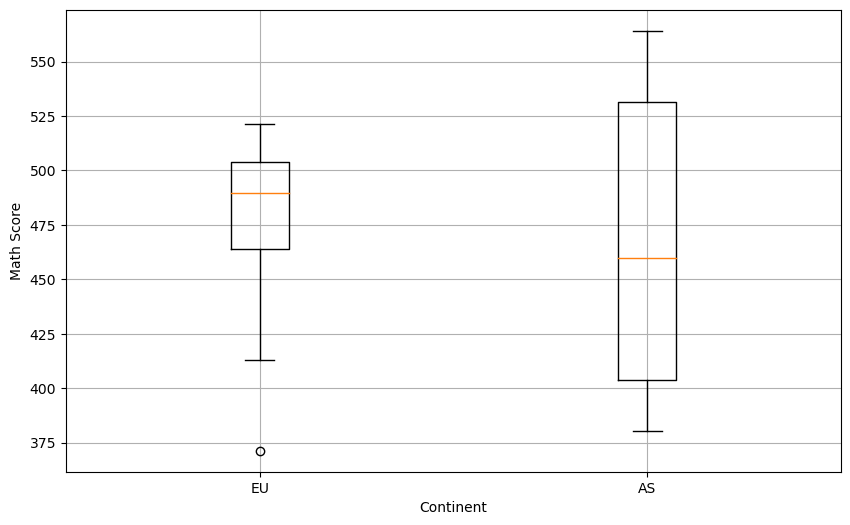

In [36]:
plt.figure(figsize=(10, 6))
plt.boxplot([continent_groups["EU"]["Math"], continent_groups["AS"]["Math"]], labels=["EU", "AS"])
plt.xlabel("Continent")
plt.ylabel("Math Score")
plt.grid(True);